# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [81]:
# Libraries
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [94]:
absences=pd.read_csv('../data/absences.csv')

In [6]:
absences.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

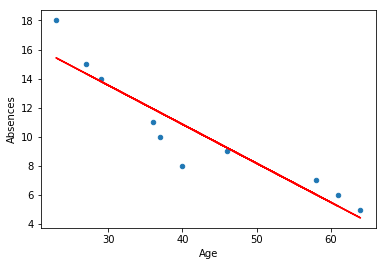

In [101]:
# your code here
clf=LinearRegression()
Y=absences['Absences']
X=absences[['Age']]
clf.fit (X,Y)
absences.plot(x='Age', y='Absences', kind='scatter')
plt.plot(absences['Age'],clf.predict(X), color='red')

In [ ]:
# there is a negativ correlation

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [63]:
def substract_mean(X):
    x_mean=np.mean(X)
    
    
    return [elem-x_mean for elem in X]

In [66]:
def slope (X,Y):
    n=len(X)
    X=substract_mean(X)
    Y=substract_mean(Y)
    sum1=0
    sum2=0
    for x, y in zip (X,Y):
        
        sum1=sum1+x*y
        sum2=sum2+(x**2)
    return sum1/sum2

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [67]:
# your code here
X=list(absences['Age'])
Y=list(absences['Absences'])
m=round(slope(X,Y), ndigits=2)
m

-0.27

In [58]:
#function for regression line: y=mx+b
b=15-(m*27)
b

22.29

In [ ]:
# the regression line is Y=-0.27X+22.29

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [68]:
def substract_mean(X):
    x_mean=np.mean(X)
    
    return [elem-x_mean for elem in X]

In [69]:
# your code here


def covar (X,Y):
    n=len(X)
    X=substract_mean(X)
    Y=substract_mean(Y)
    sum1=0
    for x, y in zip (X,Y):
        sum1=sum1+x*y
    return sum1/(n-1)

In [70]:
def correlation(X,Y):
    std_x=np.std(X)
    std_y=np.std(Y)
    return covar(X,Y)/(std_x*std_y)

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [71]:
# your code here
X=list(absences['Age'])
Y=list(absences['Absences'])
cov=round(covar(X,Y), ndigits=2)
cov

-57.7

In [72]:
# your comments here
corr=correlation(X,Y)
corr

-1.0361593436090013

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# there is a negative correlation. that means the older ppl get the less absences they have. so it would be wise to require older people. 

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [74]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [75]:
# your code here
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [76]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


In [ ]:
# your comments here: high correlation betweend the two variables

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

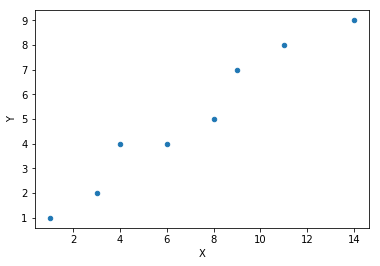

In [79]:
# your code here
plot=ironbeers_df.plot(x='X', y='Y', kind='scatter')

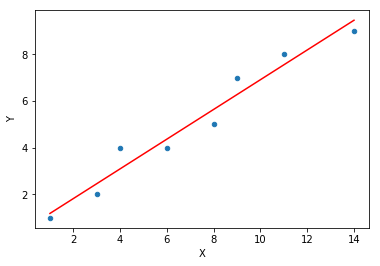

In [102]:
clf=LinearRegression()
Y=ironbeers_df['Y']
X=ironbeers_df[['X']]
clf.fit (X,Y)
plot=ironbeers_df.plot(x='X', y='Y', kind='scatter')
plt.plot(ironbeers_df['X'],clf.predict(X), color='red')

In [ ]:
# your comments here: you see the nice correlation between the two in the plot

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [103]:
# your code here
m=clf.coef_[0]
b=clf.intercept_
print('y=', round(m,2), ' x + ', round(b,2))


y= 0.64  x +  0.55


In [104]:
# your comments here: the correlation is positive, so the intereception of x will be somewhere around x=-0.8 and the interception of y is at 0.55

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [105]:
# your comments here: no, it is the opposit. the more she tells people, the more will stay. it is not because of her. 

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here